___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#@title Standardtext für Titel
'''import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))'''

'import tensorflow as tf\nimport os\n\n# Note that the `tpu` argument is for Colab-only\nresolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=\'grpc://\' + os.environ[\'COLAB_TPU_ADDR\'])\n\ntf.config.experimental_connect_to_cluster(resolver)\ntf.tpu.experimental.initialize_tpu_system(resolver)\nprint("All devices: ", tf.config.list_logical_devices(\'TPU\'))'

In [ ]:
#strategy = tf.distribute.TPUStrategy(resolver)

In [4]:
import tensorflow as tf
import os
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.9.2


BaseException: ignored

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df0 = pd.read_csv("drive/MyDrive/Colab_Notebooks&Files/Womens_Clothing_E-Commerce_Reviews.csv", index_col=0)
df=df0.copy()
df.head(10)

Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   
5  I love tracy reese dresses, but this one is no...       2                0   
6  I aded this in my basket at hte last mintue to...       5                1   
7  I ordered this in carbon for store pick up, an...       4                1   
8  I love this dress. i usually get an xs but it ...       5                1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits  
7                        4  General Petite            Tops      Knits  
8                        0         General         Dresses    Dresses  
9                        0         General         Dresses    Dresses

In [133]:
df

text  recommend
0      Absolutely wonderful - silky and sexy and comf...          0
1      Love this dress!  it's sooo pretty.  i happene...          0
2      I had such high hopes for this dress and reall...          1
3      I love, love, love this jumpsuit. it's fun, fl...          0
4      This shirt is very flattering to all due to th...          0
...                                                  ...        ...
22635  I was very happy to snag this dress at such a ...          0
22636  It reminds me of maternity clothes. soft, stre...          0
22637  This fit well, but the top was very see throug...          1
22638  I bought this dress for a wedding i have this ...          0
22639  This dress in a lovely platinum is feminine an...          0

[22640 rows x 2 columns]

### Data Wrangling

In [7]:
df.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

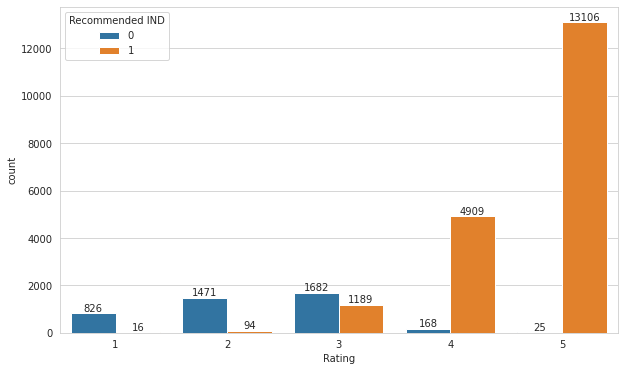

In [8]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [9]:
df.duplicated().sum()

21

In [10]:
df.drop_duplicates(inplace=True)

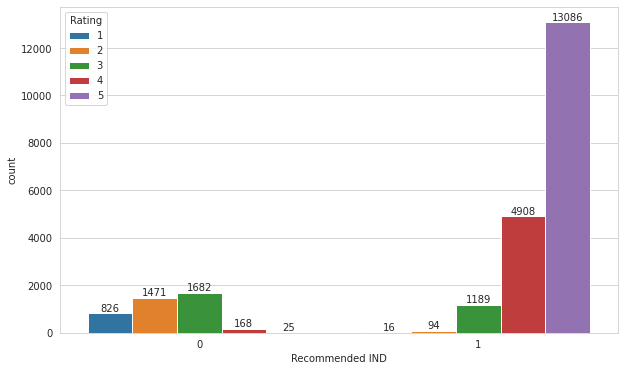

In [11]:
ax = sns.countplot(data = df, x="Recommended IND", hue="Rating")

for p in ax.containers:
    ax.bar_label(p)


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

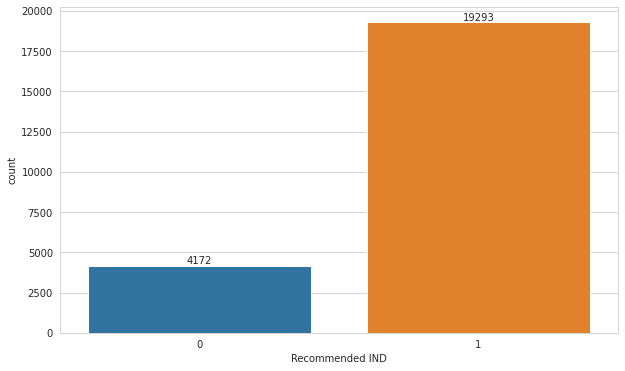

In [12]:
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [13]:
df.rename(columns={"Review Text":"text", "Recommended IND":"recommend"}, inplace=True)

In [14]:
df.head(10)

Clothing ID  Age                                 Title  \
0          767   33                                   NaN   
1         1080   34                                   NaN   
2         1077   60               Some major design flaws   
3         1049   50                      My favorite buy!   
4          847   47                      Flattering shirt   
5         1080   49               Not for the very petite   
6          858   39                  Cagrcoal shimmer fun   
7          858   39  Shimmer, surprisingly goes with lots   
8         1077   24                            Flattering   
9         1077   34                     Such a fun dress!   

                                                text  Rating  recommend  \
0  Absolutely wonderful - silky and sexy and comf...       4          1   
1  Love this dress!  it's sooo pretty.  i happene...       5          1   
2  I had such high hopes for this dress and reall...       3          0   
3  I love, love, love this jumpsuit. it's fun, fl...       5          1   
4  This shirt is very flattering to all due to th...       5          1   
5  I love tracy reese dresses, but this one is no...       2          0   
6  I aded this in my basket at hte last mintue to...       5          1   
7  I ordered this in carbon for store pick up, an...       4          1   
8  I love this dress. i usually get an xs but it ...       5          1   
9  I'm 5"5' and 125 lbs. i ordered the s petite t...       5          1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses  
5                        4         General         Dresses    Dresses  
6                        1  General Petite            Tops      Knits  
7                        4  General Petite            Tops      Knits  
8                        0         General         Dresses    Dresses  
9                        0         General         Dresses    Dresses

---
---


In [15]:
df=df[['text','recommend']]
df.head()

text  recommend
0  Absolutely wonderful - silky and sexy and comf...          1
1  Love this dress!  it's sooo pretty.  i happene...          1
2  I had such high hopes for this dress and reall...          0
3  I love, love, love this jumpsuit. it's fun, fl...          1
4  This shirt is very flattering to all due to th...          1

### Missing Value Detection

In [16]:
df.isnull().sum()

text         825
recommend      0
dtype: int64

In [17]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
df

text  recommend
0      Absolutely wonderful - silky and sexy and comf...          1
1      Love this dress!  it's sooo pretty.  i happene...          1
2      I had such high hopes for this dress and reall...          0
3      I love, love, love this jumpsuit. it's fun, fl...          1
4      This shirt is very flattering to all due to th...          1
...                                                  ...        ...
22635  I was very happy to snag this dress at such a ...          1
22636  It reminds me of maternity clothes. soft, stre...          1
22637  This fit well, but the top was very see throug...          0
22638  I bought this dress for a wedding i have this ...          1
22639  This dress in a lovely platinum is feminine an...          1

[22640 rows x 2 columns]

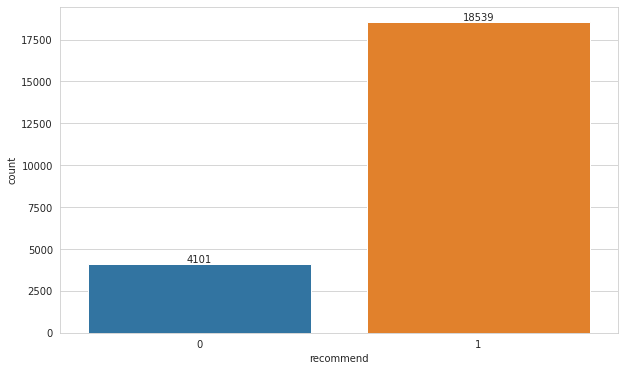

In [18]:
ax = sns.countplot(data=df, x="recommend")
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [19]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [20]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [21]:
cleaning_text = df["text"].apply(cleaning)
np.array(cleaning_text.head(5))

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c',
       'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment',
       'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt'],
      dtype=object)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [22]:
positive_reviews = df[df["recommend"] == 1]["text"]
positive_reviews = positive_reviews.apply(cleaning)
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22634    wasnt sure ordering skirt couldnt see person f...
22635    happy snag dress great price easy slip flatter...
22636    reminds maternity clothes soft stretchy shiny ...
22638    bought dress wedding summer cute unfortunately...
22639    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18539, dtype: object

In [23]:
negative_reviews = df[df["recommend"] == 0]["text"]
negative_reviews = negative_reviews.apply(cleaning)
negative_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22605    tried color really pretty fun donset want pair...
22606    wanted love jacket soft great color unfortunat...
22616    purchased good price typically love maeve fabr...
22633    surprised positive review product terrible cut...
22637    fit well top see never would worked im glad ab...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [24]:
positive_words = " ".join(positive_reviews)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [25]:
negative_words = " ".join(negative_reviews)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [26]:
from wordcloud import WordCloud

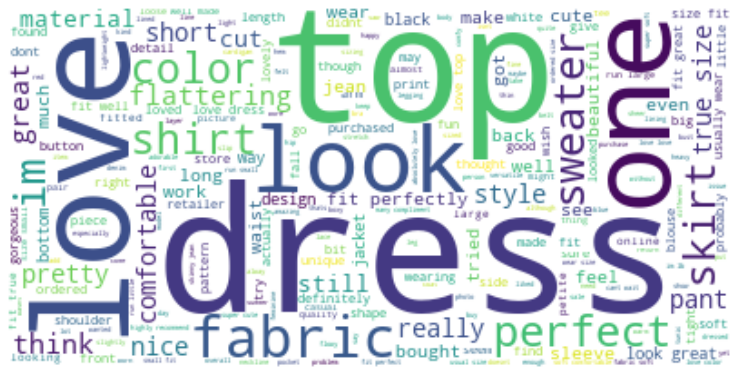

In [27]:
worldcloud_positive = WordCloud(background_color="white", max_words =250)
worldcloud_positive.generate(positive_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_positive, interpolation="bilinear",)                 #interpolation : renklendirme
plt.axis("off")                                                   # Cerceve olsun mu?
plt.show()

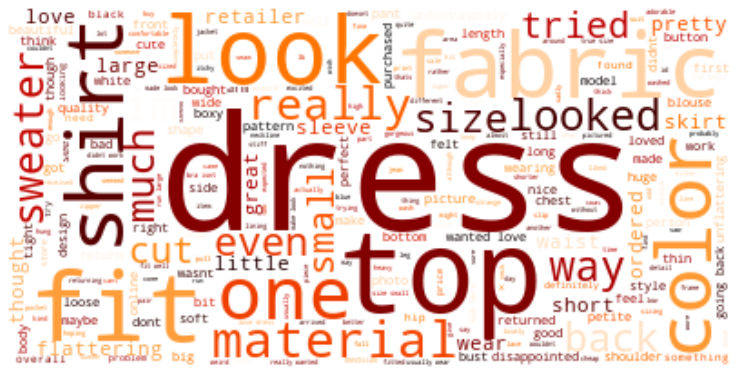

In [29]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df["text"]
y = df["recommend"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
X_train

17750    This top is so cute and so comfy. i love the d...
20577    Great arm coverage, soft material, flattering ...
11032    I tried on the xs and the shoulder are fit, bu...
12924    This dress runs a bit small. the large arm hol...
7907     Smooth to the touch and body skimming, this dr...
                               ...                        
12252    I have been unable to find a jumpsuit that loo...
18091    I ordered the red motif online in my current s...
16495    According to the sizing chart i should be an 8...
17687    This top was just not flattering. i'm 5'8" and...
10931    I feel so lucky to have caught this as a popba...
Name: text, Length: 18112, dtype: object

In [35]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [36]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0     0        0        0     0    0         0           0   
1       0     0        0        0     0    0         0           0   
2       0     0        0        0     0    0         0           0   
3       0     0        0        0     0    0         0           0   
4       0     0        0        0     0    0         0           0   
...    ..   ...      ...      ...   ...  ...       ...         ...   
18107   0     0        0        0     0    0         0           0   
18108   0     0        0        0     0    0         0           0   
18109   0     0        0        0     0    0         0           0   
18110   0     0        0        0     0    0         0           0   
18111   0     0        0        0     0    0         0           0   

       absolutley  abstract  abt  abundance  ac  accent  accented  accentuate  \
0               0         0    0          0   0       0         0           0   
1               0         0    0          0   0       0         0           0   
2               0         0    0          0   0       0         0           0   
3               0         0    0          0   0       0         0           0   
4               0         0    0          0   0       0         0           0   
...           ...       ...  ...        ...  ..     ...       ...         ...   
18107           0         0    0          0   0       0         0           0   
18108           0         0    0          0   0       0         0           0   
18109           0         0    0          0   0       0         0           0   
18110           0         0    0          0   0       0         0           0   
18111           0         0    0          0   0       0         0           0   

       accentuated  accentuates  accentuating  acceptable  access  \
0                0            0             0           0       0   
1                0            0             0           0       0   
2                0            0             0           0       0   
3                0            0             0           0       0   
4                0            0             0           0       0   
...            ...          ...           ...         ...     ...   
18107            0            0             0           0       0   
18108            0            0             0           0       0   
18109            0            0             0           0       0   
18110            0            0             0           0       0   
18111            0            0             0           0       0   

       accessorize  accessorized  accessory  accident  accidental  \
0                0             0          0         0           0   
1                0             0          0         0           0   
2                0             0          0         0           0   
3                0             0          0         0           0   
4                0             0          1         0           0   
...            ...           ...        ...       ...         ...   
18107            0             0          0         0           0   
18108            0             0          0         0           0   
18109            0             0          0         0           0   
18110            0             0          0         0           0   
18111            0             0          0         0           0   

       accidentally  accommodate  accommodates  accommodating  accomodate  \
0                 0            0             0              0           0   
1                 0            0             0              0           0   
2                 0            0             0              0           0   
3                 0            0             0              0           0   
4                 0            0             0              0           0   
...             ...          ...           ...            ...         ...

### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [40]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able   abo  absolute  absolutely  \
0     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
1     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
2     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
3     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
4     0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
...     ...   ...      ...      ...   ...   ...       ...         ...   
18107 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18108 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18109 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18110 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   
18111 0.000 0.000    0.000    0.000 0.000 0.000     0.000       0.000   

       absolutley  abstract   abt  abundance    ac  accent  accented  \
0           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
1           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
2           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
3           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
4           0.000     0.000 0.000      0.000 0.000   0.000     0.000   
...           ...       ...   ...        ...   ...     ...       ...   
18107       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
18108       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
18109       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
18110       0.000     0.000 0.000      0.000 0.000   0.000     0.000   
18111       0.000     0.000 0.000      0.000 0.000   0.000     0.000   

       accentuate  accentuated  accentuates  accentuating  acceptable  access  \
0           0.000        0.000        0.000         0.000       0.000   0.000   
1           0.000        0.000        0.000         0.000       0.000   0.000   
2           0.000        0.000        0.000         0.000       0.000   0.000   
3           0.000        0.000        0.000         0.000       0.000   0.000   
4           0.000        0.000        0.000         0.000       0.000   0.000   
...           ...          ...          ...           ...         ...     ...   
18107       0.000        0.000        0.000         0.000       0.000   0.000   
18108       0.000        0.000        0.000         0.000       0.000   0.000   
18109       0.000        0.000        0.000         0.000       0.000   0.000   
18110       0.000        0.000        0.000         0.000       0.000   0.000   
18111       0.000        0.000        0.000         0.000       0.000   0.000   

       accessorize  accessorized  accessory  accident  accidental  \
0            0.000         0.000      0.000     0.000       0.000   
1            0.000         0.000      0.000     0.000       0.000   
2            0.000         0.000      0.000     0.000       0.000   
3            0.000         0.000      0.000     0.000       0.000   
4            0.000         0.000      0.188     0.000       0.000   
...            ...           ...        ...       ...         ...   
18107        0.000         0.000      0.000     0.000       0.000   
18108        0.000         0.000      0.000     0.000       0.000   
18109        0.000         0.000      0.000     0.000       0.000   
18110        0.000         0.000      0.000     0.000       0.000   
18111        0.000         0.000      0.000     0.000       0.000   

       accidentally  accommodate  accommodates  accommodating  accomodate  \
0             0.000        0.000         0.000          0.000       0.000   
1             0.000        0.000         0.000          0.000       0.000   
2             0.000        0.000         0.000          0.000       0.000   
3             0.000        0.000         0.000          0.000       0.000   
4             0.000        0.000         0.000          0.000       0.000   
...

## Logistic Regression

### CountVectorizer

In [42]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [44]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 700  120]
 [ 550 3158]]
Test_Set
              precision    recall  f1-score   support

           0       0.56      0.85      0.68       820
           1       0.96      0.85      0.90      3708

    accuracy                           0.85      4528
   macro avg       0.76      0.85      0.79      4528
weighted avg       0.89      0.85      0.86      4528

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight= "balanced", random_state=101)
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1': make_scorer(f1_score)}
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.855
test_precision   0.961
test_recall      0.858
test_f1          0.906
dtype: float64

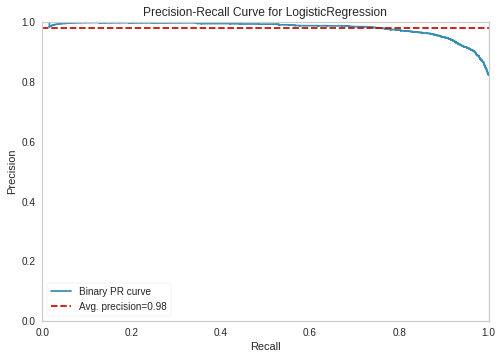

In [46]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [47]:
y_pred = log.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, average = None)
log_count_f1 = f1_score(y_test, y_pred, average = None)
log_AP = viz.score_

### TF-IDF

In [48]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [49]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 712  108]
 [ 533 3175]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.87      0.69       820
           1       0.97      0.86      0.91      3708

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      3281
           1       0.98      0.87      0.92     14831

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [50]:
model = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.859
test_precision   0.964
test_recall      0.860
test_f1          0.909
dtype: float64

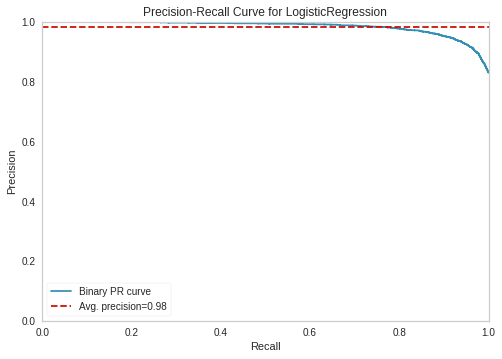

In [51]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.6, max_iter=1000, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [52]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [60]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = BernoulliNB(alpha=1)
nb.fit(X_train_count,y_train)

BernoulliNB(alpha=1)

In [61]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 588  232]
 [ 300 3408]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       820
           1       0.94      0.92      0.93      3708

    accuracy                           0.88      4528
   macro avg       0.80      0.82      0.81      4528
weighted avg       0.89      0.88      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



In [62]:
model = BernoulliNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.876
test_precision   0.940
test_recall      0.907
test_f1          0.923
dtype: float64

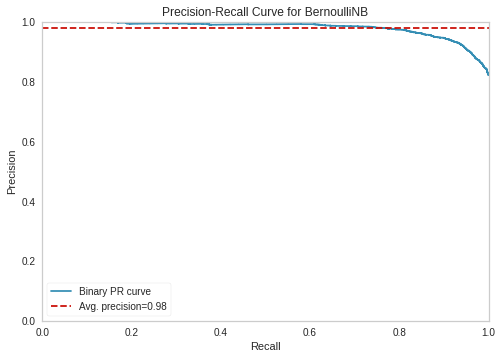

In [63]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=1),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [64]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [65]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [66]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 588  232]
 [ 300 3408]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       820
           1       0.94      0.92      0.93      3708

    accuracy                           0.88      4528
   macro avg       0.80      0.82      0.81      4528
weighted avg       0.89      0.88      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.68      0.80      0.74      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112



In [67]:
model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.876
test_precision   0.940
test_recall      0.907
test_f1          0.923
dtype: float64

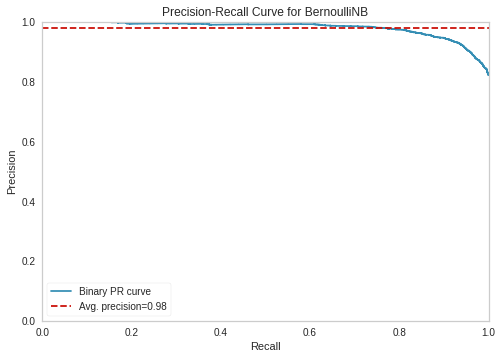

In [68]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [69]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [70]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [71]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 466  354]
 [ 134 3574]]
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       820
           1       0.91      0.96      0.94      3708

    accuracy                           0.89      4528
   macro avg       0.84      0.77      0.80      4528
weighted avg       0.89      0.89      0.89      4528

Train_Set
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      3281
           1       0.92      0.97      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.88      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [72]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.887
test_precision   0.907
test_recall      0.960
test_f1          0.933
dtype: float64

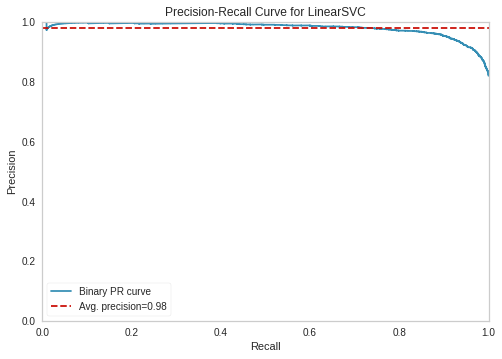

In [73]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [74]:
y_pred = svc.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, average = None)
svc_count_f1 = f1_score(y_test, y_pred, average = None)
svc_AP = viz.score_

### TD-IDF

In [75]:
svc = LinearSVC(C=0.1, class_weight="balanced", random_state=101)  #eger overfit yoksa C yi daha kücük vermeliyiz.
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=101)

In [76]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 700  120]
 [ 499 3209]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.85      0.69       820
           1       0.96      0.87      0.91      3708

    accuracy                           0.86      4528
   macro avg       0.77      0.86      0.80      4528
weighted avg       0.90      0.86      0.87      4528

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.93      0.76      3281
           1       0.98      0.88      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.84     18112
weighted avg       0.92      0.89      0.90     18112



In [77]:
model = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.864
test_precision   0.964
test_recall      0.866
test_f1          0.912
dtype: float64

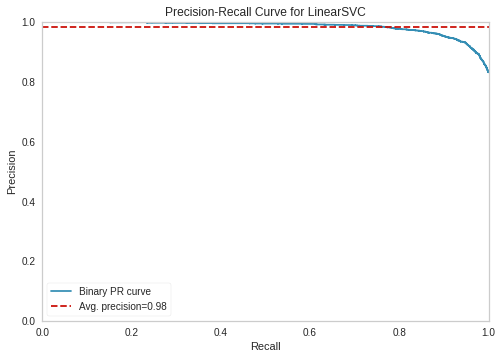

In [78]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [79]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 8, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=42)

In [91]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 665  155]
 [ 649 3059]]
Test_Set
              precision    recall  f1-score   support

           0       0.51      0.81      0.62       820
           1       0.95      0.82      0.88      3708

    accuracy                           0.82      4528
   macro avg       0.73      0.82      0.75      4528
weighted avg       0.87      0.82      0.84      4528

Train_Set
              precision    recall  f1-score   support

           0       0.55      0.88      0.68      3281
           1       0.97      0.84      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [92]:
model = RandomForestClassifier(100, max_depth = 8, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.819
test_precision   0.819
test_recall      1.000
test_f1          0.900
dtype: float64

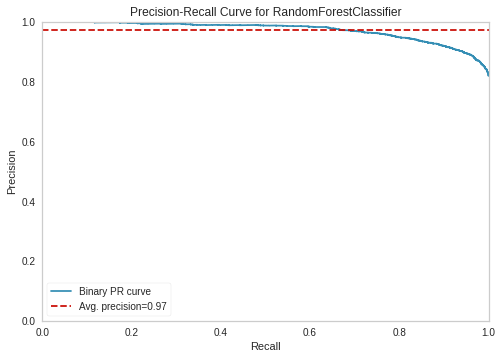

In [93]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 8, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [94]:
y_pred = rf.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, average = None)
rf_count_f1 = f1_score(y_test, y_pred, average = None)
rf_AP = viz.score_

### TF-IDF

In [95]:
rf = RandomForestClassifier(100, max_depth=8, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=42)

In [96]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 668  152]
 [ 689 3019]]
Test_Set
              precision    recall  f1-score   support

           0       0.49      0.81      0.61       820
           1       0.95      0.81      0.88      3708

    accuracy                           0.81      4528
   macro avg       0.72      0.81      0.75      4528
weighted avg       0.87      0.81      0.83      4528

Train_Set
              precision    recall  f1-score   support

           0       0.53      0.89      0.67      3281
           1       0.97      0.82      0.89     14831

    accuracy                           0.84     18112
   macro avg       0.75      0.86      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [97]:
model = RandomForestClassifier(100, max_depth = 8, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.822
test_precision   0.954
test_recall      0.823
test_f1          0.884
dtype: float64

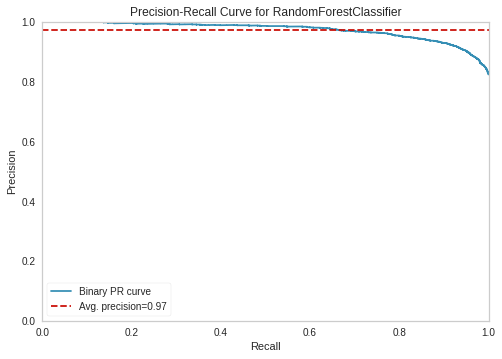

In [98]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=8, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [99]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec = recall_score(y_test, y_pred, average = None)
rf_tfidf_f1 = f1_score(y_test, y_pred, average = None)
rf_tfidf_AP = viz.score_

## Ada Boosting

### Countvectorizer

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [101]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 484  336]
 [ 180 3528]]
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       820
           1       0.91      0.95      0.93      3708

    accuracy                           0.89      4528
   macro avg       0.82      0.77      0.79      4528
weighted avg       0.88      0.89      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.66      0.73      3281
           1       0.93      0.96      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.87      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [102]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.878
test_precision   0.910
test_recall      0.944
test_f1          0.927
dtype: float64

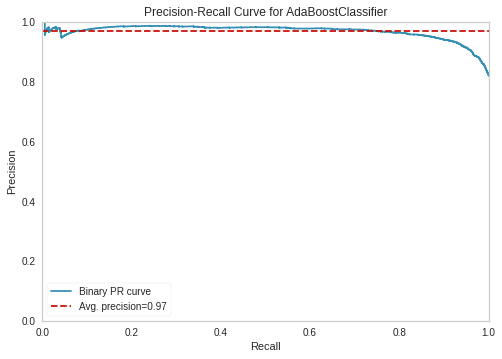

In [103]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [104]:
y_pred = ada.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, average = None)
ada_count_f1 = f1_score(y_test, y_pred, average = None)
ada_AP = viz.score_

### TF-IDF

In [105]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, )
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [106]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 497  323]
 [ 214 3494]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       820
           1       0.92      0.94      0.93      3708

    accuracy                           0.88      4528
   macro avg       0.81      0.77      0.79      4528
weighted avg       0.88      0.88      0.88      4528

Train_Set
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [107]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.873
test_precision   0.908
test_recall      0.941
test_f1          0.924
dtype: float64

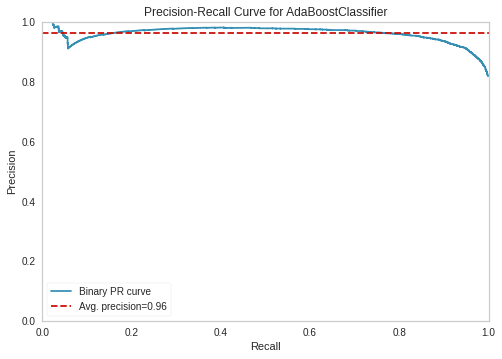

In [108]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [109]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec = recall_score(y_test, y_pred, average = None)
ada_tfidf_f1 = f1_score(y_test, y_pred, average = None)
ada_tfidf_AP = viz.score_

## DL modeling

In [110]:
df.recommend = df.recommend.map({1:0, 0:1})

In [112]:
df.recommend.value_counts(normalize=True)

0   0.819
1   0.181
Name: recommend, dtype: float64

### Tokenization

In [114]:
X = df['text']
y = df['recommend']

In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [117]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [118]:
tokenizer.fit_on_texts(X)

### Creating word index

In [119]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [120]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [121]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [122]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [123]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


### Maximum number of tokens for all documents¶

In [124]:
len(X_num_tokens[105])

63

In [125]:
len(X_num_tokens[106])

7

In [126]:
len(X_num_tokens[6150])

11

In [127]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [128]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [129]:
num_tokens.mean()

60.6077738515901

In [130]:
num_tokens.max()

116

In [131]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

16263

In [132]:
X[num_tokens.argmax()]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [134]:
len(X_num_tokens[num_tokens.argmax()])

116

In [135]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 11)
print(sum(np.array(list) < 11))
print(sum(np.array(list) < 11)/len(list))

[ True  True  True  True False False]
4
0.6666666666666666


In [136]:
max_tokens = 61

In [137]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.5121466431095406

In [138]:
sum(num_tokens < max_tokens)

11595

In [139]:
len(num_tokens)

22640

### Fixing token counts of all documents (pad_sequences)

In [140]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [141]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [142]:
X_pad.shape

(22640, 61)

In [143]:
np.array(X_num_tokens[800])

array([   5,    6,   16,  548,   10,  676,    3,   73,    2,   38,  384,
          3,  659, 1077,    3,  285,   46,   78,   31,  150])

In [144]:
len(np.array(X_num_tokens[800]))

20

In [145]:
X_pad[800]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    5,    6,   16,
        548,   10,  676,    3,   73,    2,   38,  384,    3,  659, 1077,
          3,  285,   46,   78,   31,  150], dtype=int32)

In [146]:
np.array(X_num_tokens[num_tokens.argmax()])

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

In [147]:
X_pad[num_tokens.argmax()]

array([   5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4], dtype=int32)

### Train Set Split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=0)

### Modeling

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam

In [152]:
model = Sequential()

In [169]:
embedding_size = 50

In [170]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))

model.add(Dense(1, activation='sigmoid'))

In [171]:
optimizer = Adam(learning_rate=0.008)

In [172]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [173]:
model.summary() 
# embedding_size * num_words ==> 50 * 15000

# 3 x (n2 + nm + 2n) m= input, n= output
# (48*48 + 50*48 + 2*48)*3 ==> m = 50, n = 48
# (24*24 + 48*24 + 2*24)*3 ==> m = 48, n = 24
# (12*12 + 24*12 + 2*12)*3 ==> m = 24, n = 12
# 12*1 + 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750000    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 48)            14400     
                                                                 
 dropout_1 (Dropout)         (None, 61, 48)            0         
                                                                 
 gru_1 (GRU)                 (None, 61, 24)            5328      
                                                                 
 dropout_2 (Dropout)         (None, 61, 24)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [174]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [175]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [176]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10


71/71 [==============================] - 13s 94ms/step - loss: 0.6936 - recall: 0.5940 - val_loss: 0.6830 - val_recall: 0.0000e+00
Epoch 2/10
71/71 [==============================] - 5s 68ms/step - loss: 0.6934 - recall: 0.4852 - val_loss: 0.6844 - val_recall: 0.0000e+00
Epoch 2: early stopping


## BERT Modeling

### Tokenization

### Train test split

### Transformation text to tensor

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___